# Data Ninja - Secret places to open a restaurant (Part II)
**Fernanda Oliveira**  
Data Scientist

First, I will import the libraries necessary for this project.

In [1]:
import numpy as np # library to handle data in a vectorized manner

In [2]:
import pandas as pd # library for data analysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files


In [3]:
import requests # library to handle requests

In [4]:
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

In [5]:
#!pip install seaborn
import seaborn as sns

In [6]:
import matplotlib.pyplot as plt
from matplotlib.ticker import EngFormatter  
from matplotlib.ticker import PercentFormatter  

In [7]:
# import k-means from clustering stage
from sklearn.cluster import KMeans

In [8]:
df_jc = pd.read_csv("japanesecategory.csv")
df_jc.drop(['Unnamed: 0'], axis=1, inplace=True);
df_jc.drop(['distance [m]'], axis=1, inplace=True);
df_jc.head()

,id,name,categories,lat,lng,neighborhood
0,55f9a48e498ee737a1893058,Heno Heno,Japanese Restaurant,52.503964,13.315578,Wielandstr. 37
1,4bbe353b9474c9b63e41d9b6,Kushinoya,Japanese Restaurant,52.505372,13.319982,Bleibtreustr. 6
2,570b97c4498e2c6e7c5eb991,Smart Deli,Japanese Restaurant,52.528094,13.389060,Novalisstr. 2
3,57c9e26a498ed1dcbbd0b461,Sticks'n'Sushi,Japanese Restaurant,52.502020,13.365064,Potsdamer Str. 85
4,4c0fde34ce57c928f7f580d2,Green Tea Café MAMECHA,Japanese Restaurant,52.527284,13.406305,Mulackstr. 33 (Rückerstr.)


In [9]:
df_s = pd.read_csv("sbahncategory.csv")
df_s.drop(['Unnamed: 0'], axis=1, inplace=True);
df_s.drop(['distance [m]'], axis=1, inplace=True);
df_s.head()

,id,name,categories,lat,lng,neighborhood
0,4a1c8506f964a520457b1fe3,Berlin Hauptbahnhof,Light Rail Station,52.525220,13.369369,Europaplatz 1 (Washingtonplatz)
1,4af5f0c7f964a52020ff21e3,Bahnhof Berlin Friedrichstraße,Light Rail Station,52.520284,13.387063,Georgenstr. 14/17
2,4b05bf38f964a5204ce222e3,Bahnhof Berlin Potsdamer Platz,Light Rail Station,52.509723,13.376597,Potsdamer Platz (Potsdamer Str.)
3,4adcda91f964a520ba4b21e3,Bahnhof Berlin Zoologischer Garten,Light Rail Station,52.506642,13.332513,Hardenbergplatz 13
4,4b01859ef964a520174322e3,S Savignyplatz,Light Rail Station,52.505093,13.319847,Bleibtreustr. 49


In [10]:
df_u = pd.read_csv("ubahn_data.csv")
df_u.drop(['Unnamed: 0'], axis=1, inplace=True);
df_u.drop(['distance [m]'], axis=1, inplace=True);
df_u.head()

,id,name,categories,lat,lng,neighborhood
0,4bfb2cf765fbc9b66f23916c,U Rehberge,Metro Station,52.555570,13.343412,Müllerstr. (Dubliner Str.)
1,4b538a1af964a52043a127e3,U Wilmersdorfer Straße,Metro Station,52.506312,13.306770,Wilmersdorfer Str. (Kantstr.)
2,4b5de986f964a520387329e3,U Adenauerplatz,Metro Station,52.499950,13.307203,Adenauerplatz (Kurfürstendamm)
3,4b47845cf964a5209e3426e3,U Güntzelstraße,Metro Station,52.490989,13.330868,Bundesallee (Güntzelstr.)
4,4b2a3edbf964a52076a624e3,U Deutsche Oper,Metro Station,52.511193,13.311905,Bismarckstr. (Krumme Str./Weimarer Str.)


Here I saved the dataframe df_rent to a file and then I read with pandas.

In [11]:
df_r = pd.read_csv("rent_data.csv")
df_r.drop(['Unnamed: 0'], axis=1, inplace=True);
df_r.head()

,Postcode,Price,Latitude,Longitude
0,12683,2900.00,52.503731,13.559540
1,10247,2400.00,52.516340,13.463990
2,10777,1142.36,52.497685,13.342285
3,10713,3269.00,52.485240,13.311870
4,10719,5900.00,52.498245,13.327140


Here we will understand more our data collection and we will apply some descriptive statistics to answer to following answers:

* How many restaurants exists?
* How many avaiable places to rent exist?
* How many categories exist in each dataset?

In [12]:
df_jc['categories'].describe()

count                     100
unique                     10
top       Japanese Restaurant
freq                       63
Name: categories, dtype: object

In [13]:
df_jc.categories.unique()

array(['Japanese Restaurant', 'Vietnamese Restaurant', 'Sushi Restaurant',
       'Ramen Restaurant', 'Asian Restaurant', 'Chinese Restaurant',
       'Café', 'Vegetarian / Vegan Restaurant', 'Korean Restaurant',
       'Cocktail Bar'], dtype=object)

In [14]:
df_r.count()

Postcode     21
Price        21
Latitude     21
Longitude    21
dtype: int64

In [15]:
#save as a new df to insert a new column:
#df_jc.to_csv('df_jc_kc.csv', index=False)     #index=False avoid to create a column 'Unnamed:0'

In [16]:
#df_jc_kc = pd.read_csv('df_jc_kc.csv')
#df_jc_kc.head()

In [17]:
#Adds a new column 
df_jc['categories_simplified'] = df_jc['categories']
df_jc.head(3)

,id,name,categories,lat,lng,neighborhood,categories_simplified
0,55f9a48e498ee737a1893058,Heno Heno,Japanese Restaurant,52.503964,13.315578,Wielandstr. 37,Japanese Restaurant
1,4bbe353b9474c9b63e41d9b6,Kushinoya,Japanese Restaurant,52.505372,13.319982,Bleibtreustr. 6,Japanese Restaurant
2,570b97c4498e2c6e7c5eb991,Smart Deli,Japanese Restaurant,52.528094,13.389060,Novalisstr. 2,Japanese Restaurant


In [18]:
#renames values of categories to shorter names
df_jc = df_jc.replace({'categories_simplified': {'Japanese Restaurant': 'Japanese', 
                                                 'Vietnamese Restaurant': 'Vietnamese',
                                                 'Sushi Restaurant': 'Sushi', 
                                                 'Ramen Restaurant': 'Ramen',
                                                 'Asian Restaurant': 'Asian', 
                                                 'Chinese Restaurant': 'Chinese',
                                                 'Vegetarian / Vegan Restaurant': 'Veget/Vegan',
                                                 'Korean Restaurant': 'Korean'}})

df_jc.tail(20)

,id,name,categories,lat,lng,neighborhood,categories_simplified
80,4fddeb7be4b0d331696751c5,RICE IN,Sushi Restaurant,52.510948,13.462076,Grünberger Str. 88,Sushi
81,4af7f638f964a520980a22e3,Makoto,Japanese Restaurant,52.526751,13.407666,Alte Schönhauser Str. 13 (Mulackstr.),Japanese
82,59afdac08134880efbedf20e,Eden Restaurant,Vietnamese Restaurant,52.522046,13.404751,Rosenstr. 19 (Rochstr.),Vietnamese
83,4b43ceddf964a52099ea25e3,rice & more,Asian Restaurant,52.434615,13.378290,Großbeerenstr. 51,Asian
84,4ba3bdbff964a520485a38e3,Akito Sushi Bar,Japanese Restaurant,52.523833,13.387049,Reinhardtstr. 6,Japanese
85,5c1b7f03f96b2c002c8ca1fc,Secret Garden Berlin,Vegetarian / Vegan Restaurant,52.507605,13.449941,Wahrschauerstr. 32 (Helsingforser Str.),Veget/Vegan
86,4c29ab0d360cef3bc34fbedc,Sy,Sushi Restaurant,52.537891,13.206676,Breite Straße 33,Sushi
87,4b867817f964a520638b31e3,Aki Tatsu Sushi & More,Japanese Restaurant,52.497055,13.354674,Winterfeldtstr. 40,Japanese
88,540d8a24498e0ff16065fec9,Seoulkitchen Korean BBQ & Sushi,Korean Restaurant,52.503595,13.447352,Warschauer Str. 46 (Mühlenstr.),Korean
89,537dd7b4498e956dc8576472,Akito Sushi Bar,Sushi Restaurant,52.530115,13.383577,Chausseestr. 116,Sushi


In [19]:
df_jc.categories_simplified.unique()

array(['Japanese', 'Vietnamese', 'Sushi', 'Ramen', 'Asian', 'Chinese',
       'Café', 'Veget/Vegan', 'Korean', 'Cocktail Bar'], dtype=object)

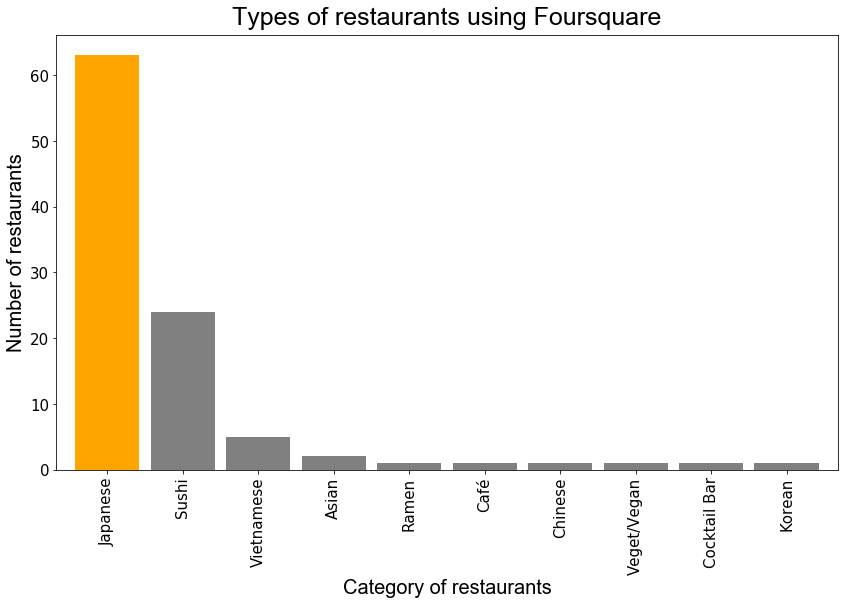

In [20]:
#ax = df_jc['categories'].value_counts().plot(kind='bar', figsize=(14,8), title="Japanese category venue")
#ax.set_xlabel("Category of restaurants")
#ax.set_ylabel("Frequency")

#Using Pandas
ax = df_jc['categories_simplified'].value_counts().plot(kind='bar', 
                                                   figsize=(14,8), 
                                                   width=.85,
                                                   color=['orange','gray','gray','gray',
                                                          'gray','gray', 'gray','gray',
                                                          'gray','gray'])                                         
                                                                                       
ax.set_title("Types of restaurants using Foursquare", fontname='Arial', fontsize=25, y=1.01)
ax.set_xlabel("Category of restaurants", fontname="Arial", fontsize=20)
ax.set_ylabel("Number of restaurants", fontname="Arial", fontsize=20) 
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(15) 
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(15)
